In [12]:
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

In [13]:
import os
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot  as plt
%matplotlib inline


URL="https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_fremont_data(filename="Fremont.csv",url=URL,force_download=False):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    data=pd.read_csv("Fremont.csv", index_col="Date",parse_dates=True)
    data.columns=['Fremont Bridge Total',"West","East"]
    data1=data[["West","East"]]
    
    return data

In [14]:
data=get_fremont_data()
data.head()

,Fremont Bridge Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [3]:
embed_video(1)

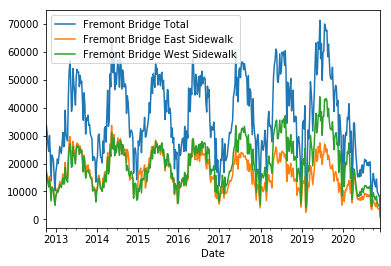

In [4]:
data.resample("W").sum().plot()

In [5]:
embed_video(2)

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')


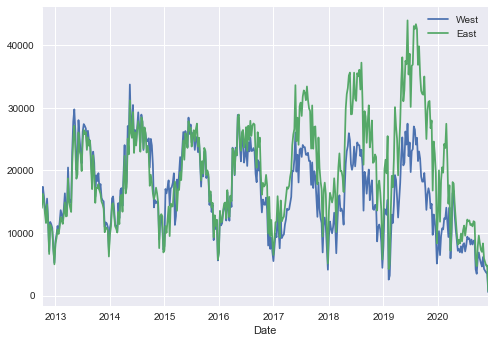

In [6]:
plt.style.use("seaborn")
print(data.columns)
data1.resample("W").sum().plot()

(0, 2519182.9)

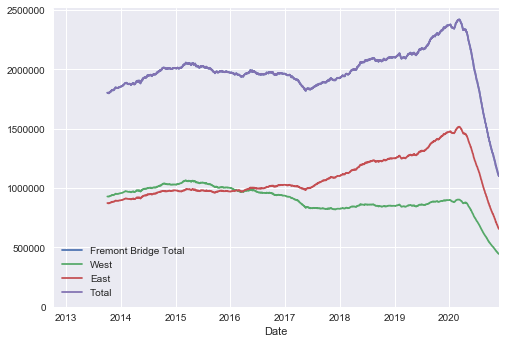

In [7]:
data["Total"]=data["West"]+data["East"]
ax=data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

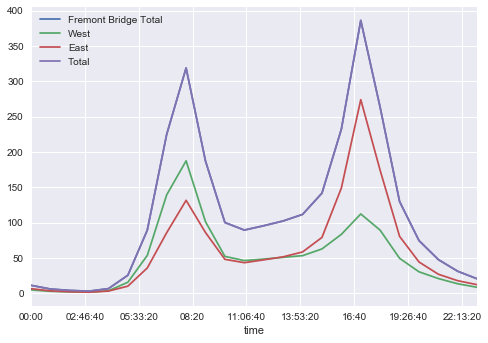

In [8]:
data.groupby(data.index.time).mean().plot()

In [9]:
pivoted=data.pivot_table("Total", index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


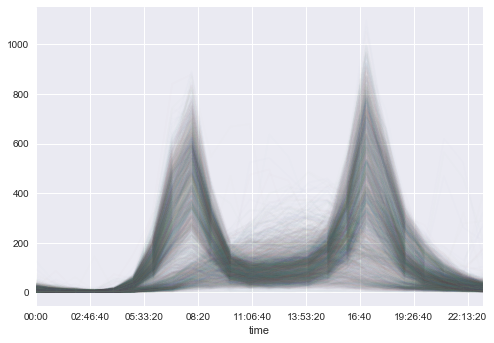

In [10]:
pivoted.plot(legend=False,alpha=0.01)

In [11]:
embed_video(3)